In [24]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv("cleaned_dataset.csv")
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_per_capita
0,Afghanistan,2002,2.342686,2.219203,2.248129,3.659193,0.122218,0.0,0.444686,4.408662,5.355936,0.875469,6.938284,179.426579
1,Afghanistan,2003,2.756110,2.351375,2.207175,3.628599,0.270027,0.0,0.488580,4.219821,5.442280,0.875469,7.107425,190.683814
2,Afghanistan,2004,3.047611,2.476538,2.169054,3.811982,0.285179,0.0,0.444686,4.157653,5.324137,0.788457,6.938284,211.382074
3,Afghanistan,2005,3.273019,2.580217,2.141242,3.551914,0.292670,0.0,0.463734,4.165748,5.533663,0.879627,7.346655,242.031313
4,Afghanistan,2006,3.456906,2.698000,2.128232,3.493169,0.182322,0.0,0.494696,4.346276,5.721691,0.916291,7.473637,263.733602


In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression

In [27]:
def categorize(row, limiters, percentiles):
    year = row['Year']
    val = row['gdp_per_capita']
    
    q = np.zeros(len(limiters))
    
    for i in range(len(limiters)):
        q[i] = percentiles.loc[year, limiters[i]]
    
    pos = 0
    
    for i in q:
        if val <= i:
            break
        else:
            pos+=1
    return pos  

In [28]:
category_min = 2
category_max = 10
loop = 25

category_max += 1

In [35]:
def calculate(model):
    accuracy = np.zeros(category_max)
    for i in range (category_min, category_max):
        category_amt = i
        limiters = np.arange(1/category_amt,1,1/category_amt)
        dataset = df

        dataset['gdp_per_capita_category'] = np.nan
        percentiles = dataset.groupby('Year')['gdp_per_capita'].quantile(limiters).unstack()

        dataset['gdp_per_capita_category'] = dataset.apply(categorize, args=(limiters, percentiles),axis=1)

        x = dataset.drop(['gdp_per_capita_category', 'gdp_per_capita', 'Entity', 'Year'], axis = 1)
        y = dataset['gdp_per_capita_category']

        acc = 0
        
        for j in range(loop):
            x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

            model.fit(x_train, y_train)
            prediction = model.predict(x_test)
            acc += metrics.accuracy_score(prediction, y_test)

        accuracy[i] = (acc/loop)
    return accuracy

In [36]:
def regress(value):
    xval = np.arange(category_min,category_max,1)
    yval = value[category_min:]

    xvalp = xval.reshape(-1,1)

    calc = LinearRegression()
    calc.fit(xvalp, yval)

    ypred = calc.predict([[category_min], [category_max-1]])
    return ypred

In [31]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [43]:
accuracy1 = calculate(SVC(kernel='linear'))
accuracy2 = calculate(LogisticRegression(max_iter=10000))
accuracy3 = calculate(RandomForestClassifier())

In [48]:
xval = np.arange(category_min,category_max,1)
acc1 = accuracy1[category_min:]
acc2 = accuracy2[category_min:]
acc3 = accuracy3[category_min:]

In [47]:
regress1 = regress(accuracy1)
regress2 = regress(accuracy2)
regress3 = regress(accuracy3)

[]

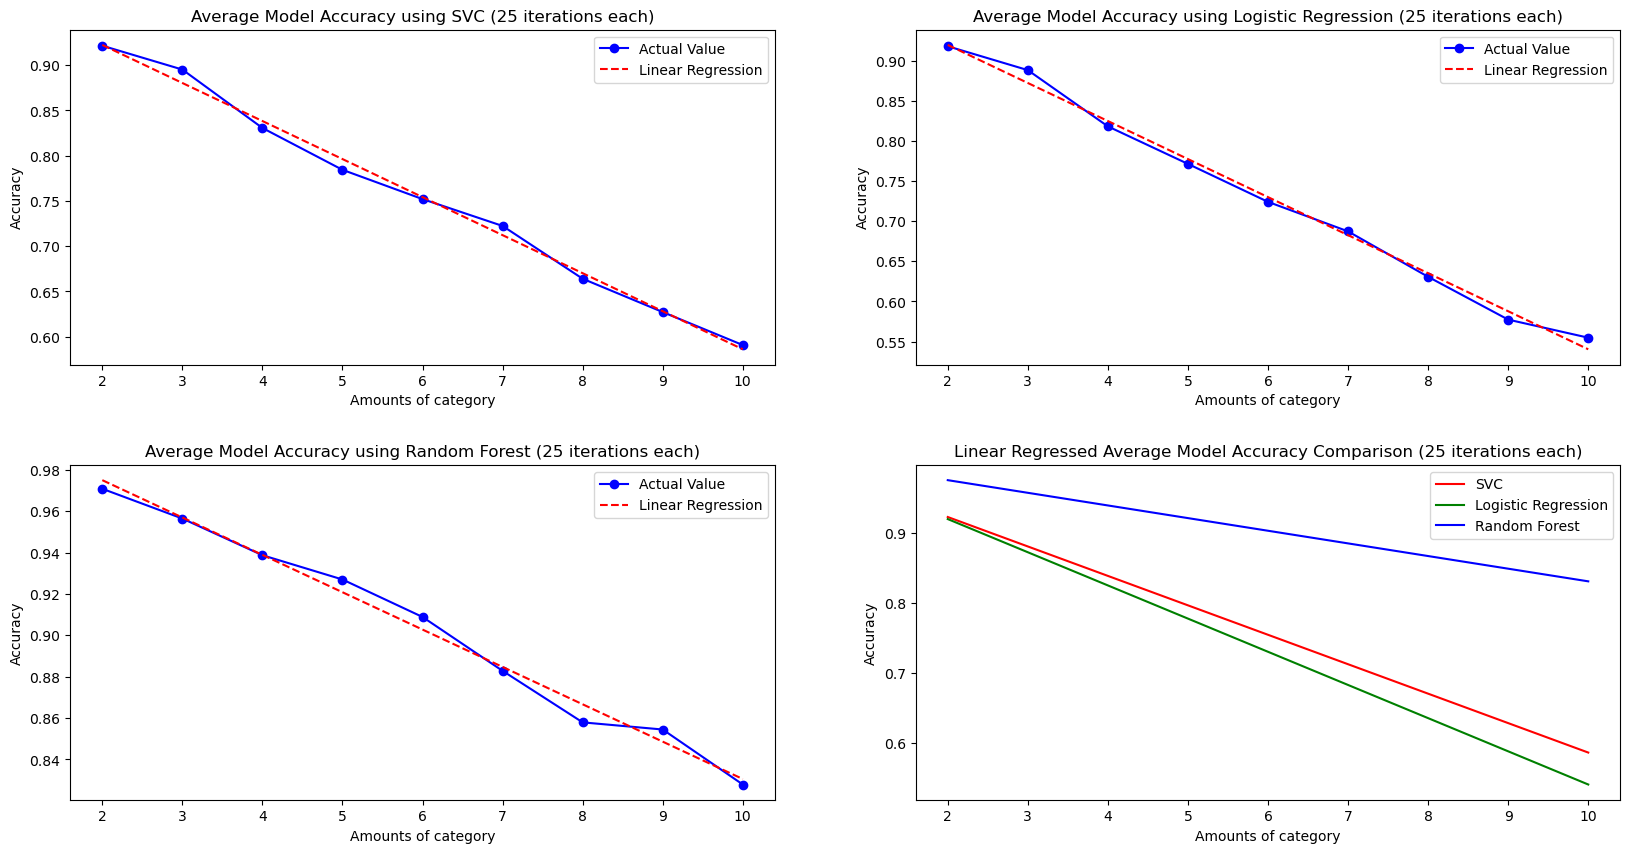

In [49]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))
plt.subplots_adjust(hspace=0.3)

ax[0,0].plot(xval, acc1, 'bo-')
ax[0,0].plot([category_min, category_max-1], regress1, 'r--')
ax[0,0].set_xticks(xval)
ax[0,0].set_xlabel('Amounts of category')
ax[0,0].set_ylabel('Accuracy')
ax[0,0].legend(labels=['Actual Value', 'Linear Regression'])
ax[0,0].set_title(f'Average Model Accuracy using SVC ({loop} iterations each)')
ax[0,0].plot()

ax[0,1].plot(xval, acc2, 'bo-')
ax[0,1].plot([category_min, category_max-1], regress2, 'r--')
ax[0,1].set_xticks(xval)
ax[0,1].set_xlabel('Amounts of category')
ax[0,1].set_ylabel('Accuracy')
ax[0,1].legend(labels=['Actual Value', 'Linear Regression'])
ax[0,1].set_title(f'Average Model Accuracy using Logistic Regression ({loop} iterations each)')
ax[0,1].plot()

ax[1,0].plot(xval, acc3, 'bo-')
ax[1,0].plot([category_min, category_max-1], regress3, 'r--')
ax[1,0].set_xticks(xval)
ax[1,0].set_xlabel('Amounts of category')
ax[1,0].set_ylabel('Accuracy')
ax[1,0].legend(labels=['Actual Value', 'Linear Regression'])
ax[1,0].set_title(f'Average Model Accuracy using Random Forest ({loop} iterations each)')
ax[1,0].plot()

ax[1,1].plot([category_min, category_max-1], regress1, 'r-')
ax[1,1].plot([category_min, category_max-1], regress2, 'g-')
ax[1,1].plot([category_min, category_max-1], regress3, 'b-')
ax[1,1].set_xticks(xval)
ax[1,1].set_xlabel('Amounts of category')
ax[1,1].set_ylabel('Accuracy')
ax[1,1].legend(labels=['SVC', 'Logistic Regression', 'Random Forest'])
ax[1,1].set_title(f'Linear Regressed Average Model Accuracy Comparison ({loop} iterations each)')
ax[1,1].plot()